Avocado Prices
Historical data on avocado prices and sales volume in multiple US markets

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [147]:
import pandas as pd
import matplotlib as plt
data=pd.read_csv('C:/Users/etokarev/OneDrive - Philip Morris International/Desktop/private/Netology/Python/Homework/_16/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:title={'center':'Average Price Dynamic. All data'}, xlabel='Date', ylabel='AvPrice'>

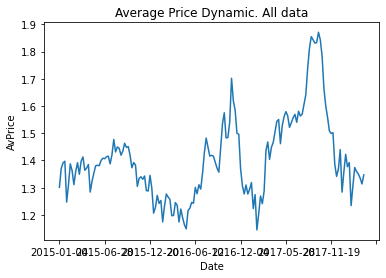

In [148]:
from datetime import datetime
def data_month(param):
    # выделяет месяц из даты
    month_=datetime.strftime(datetime.strptime(param,'%Y-%m-%d'),'%m')
    return month_

data.sort_values(by='Date', ascending='True',inplace=True)
data['Month']=data['Date'].apply(data_month)

data.groupby('Date').mean()['AveragePrice'].plot(title='Average Price Dynamic. All data', xlabel='Date', ylabel='AvPrice')
#plt.pyplot.show()


На графике  динамика продаж по датам. Тренда не видно. Возможно, есть сезонность

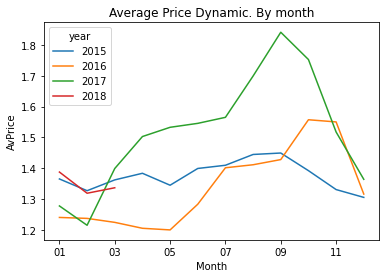

In [149]:
data_by_year=data.pivot_table(index='Month', columns ='year', values='AveragePrice', aggfunc='mean').plot(
                                                                title='Average Price Dynamic. By month', xlabel='Month', ylabel='AvPrice')


Есть увеличние продаж в сентябре, октябре, но оно очень разное

<AxesSubplot:title={'center':'Price distribution'}>

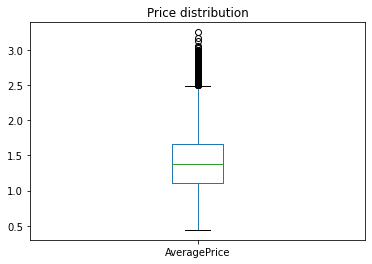

In [150]:
data['AveragePrice'].plot(kind='box', title='Price distribution')

1. Медиана равно удалена от 25 и 75 квантили. И "Усы" приблизительно одной длины. Что говорит от том, что медиана и среднее приблизительно будут сопдать
2. При этом много выбросов  выше верхней границы

<AxesSubplot:title={'center':'Price vs Volume'}, xlabel='AveragePrice', ylabel='Total Volume'>

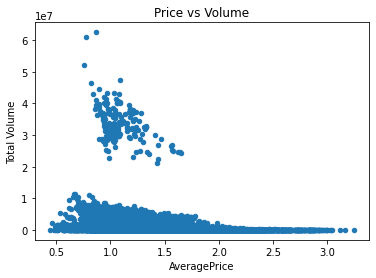

In [151]:
data.plot(kind='scatter', 
        x='AveragePrice', 
        y='Total Volume', 
        title='Price vs Volume')

1. Существует какой-то признак, по которому данные следует разделить
2. и одной, и  второй группы продажи зависят от цены

<AxesSubplot:title={'center':'Average price by Type'}, xlabel='type'>

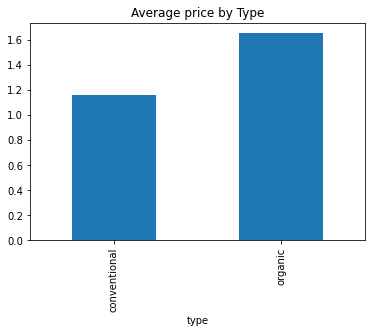

In [152]:
data.groupby('type').mean()['AveragePrice'].plot(kind='bar' , title='Average price by Type')

Средняя цена по типам существенно отличается. Больше для типа "organic". 

<AxesSubplot:title={'center':'Average price by Region'}, xlabel='region'>

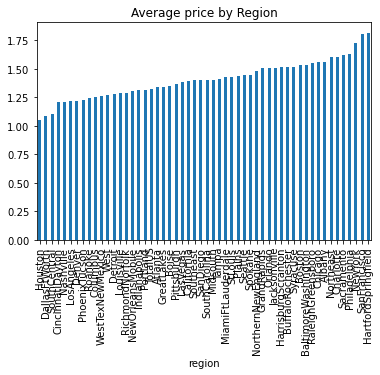

In [153]:
data.groupby('region').mean().sort_values(by='AveragePrice')['AveragePrice'].plot(kind='bar',title='Average price by Region')

<AxesSubplot:title={'center':'Volume by Region'}, xlabel='region'>

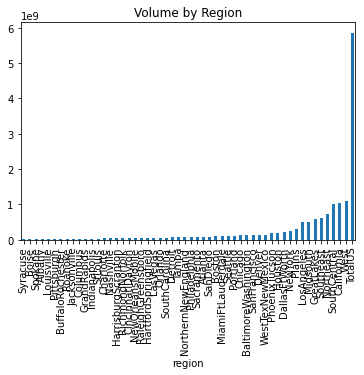

In [155]:
data.groupby('region').sum().sort_values(by='Total Volume')['Total Volume'].plot(kind='bar',title='Volume by Region')

Вероятно, это ответ на вопрос по кластеризации. В данных есть регион "total Us", где ,соответственно, совокупные продажи. Этот регион надо исключать из анализа